# Reducción de dimensiones

Una vez se han reducido a la mitad las dimensiones del dataframe con PCA, se van a reducir más con UMAP

## Importaciones de liberías

In [3]:
import numpy as np
import pandas as pd

In [4]:
import pylab as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
import umap.umap_ as umap

## Datos modificados por PCA

In [4]:
train = pd.read_csv('./data/train_pca.csv')
train.head()

,target,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,...,-4.690509,3.031281,-1.777108,-2.129503,-2.317407,5.582199,1.919842,-0.579323,1.648996,3.402656
1,0,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,8.116709,...,-5.145828,0.977441,1.555768,-1.873848,-4.411593,1.637559,-6.995692,-3.052852,6.685872,2.244896
2,0,-4.790239,-0.334213,11.359318,8.533317,1.328571,-3.218286,22.019436,-1.662104,-4.055670,...,1.599338,0.496149,0.536455,-1.872459,-0.141536,1.228398,1.816755,0.325430,-2.648416,7.804204
3,0,11.875370,14.050808,24.017588,-4.419429,0.372725,5.805502,20.132591,12.235285,-1.442250,...,-0.257944,2.962409,-2.769238,-0.984059,0.445123,0.679267,1.818855,-6.895533,0.504862,0.108736
4,0,52.713134,24.315340,4.334400,23.857627,-17.868964,16.346566,-15.373475,11.752637,-18.458728,...,-3.560096,-1.473070,-2.654762,4.163998,-1.309631,-0.513197,-7.231648,7.512688,-2.011657,0.729106


### Reducción a dos dimensiones sin target

In [5]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(train.drop(columns=['target']))

In [6]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.shape

(200000, 3)

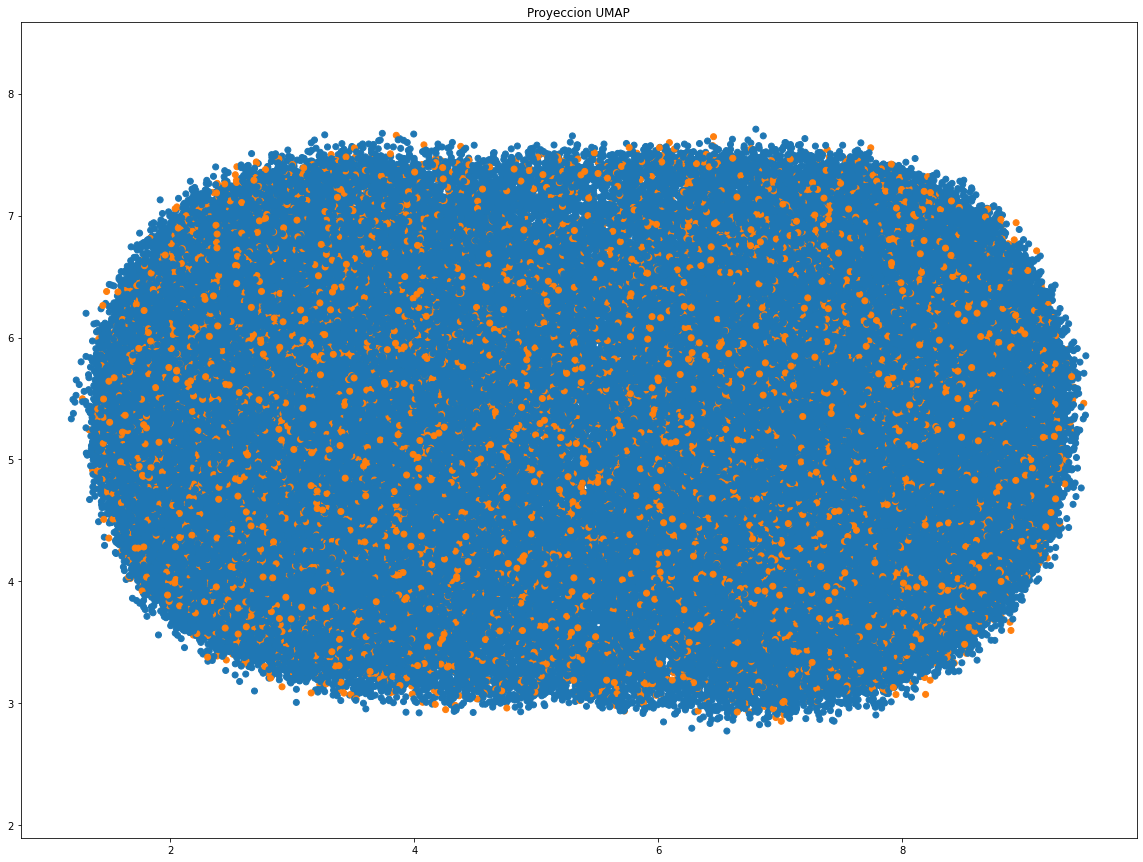

In [7]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Se ha clusterizado con umap el dataframe para reducirlo a 2 dimensiones y poder visualizarlo, pero se concluye que la clusterización no depende del taget, por lo que se va a dividir el dataframe de entrenamiento en dos partes para obligar a umap a clusterizar en función del target y comprobar si la clusterización permite o no predecir el target

### Reducción a dos dimensiones con target

In [8]:
X = train.drop(columns=['target'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [9]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [10]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [11]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,-1.469024,-2.581188,0
1,-0.655366,-0.979468,0
2,1.377062,-3.396436,0
3,3.045709,0.191528,1
4,-0.488532,-0.377128,0


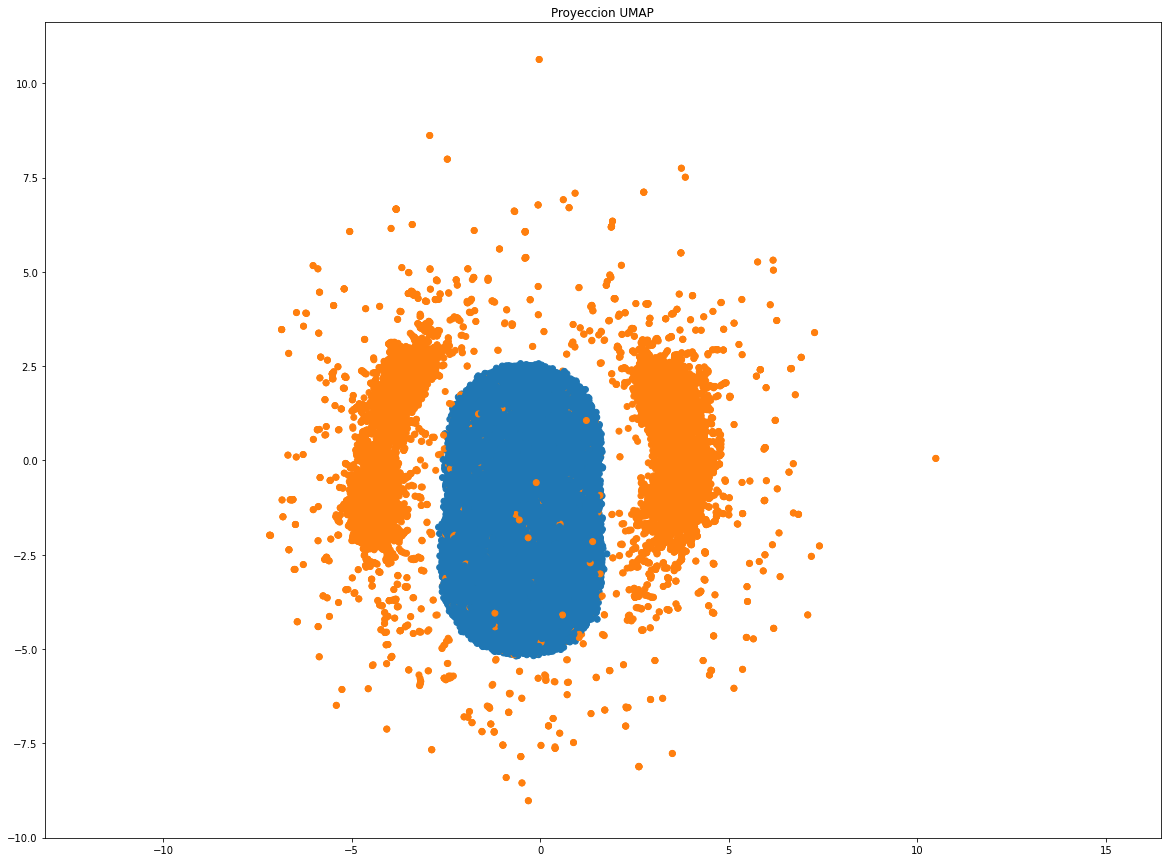

In [12]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [13]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

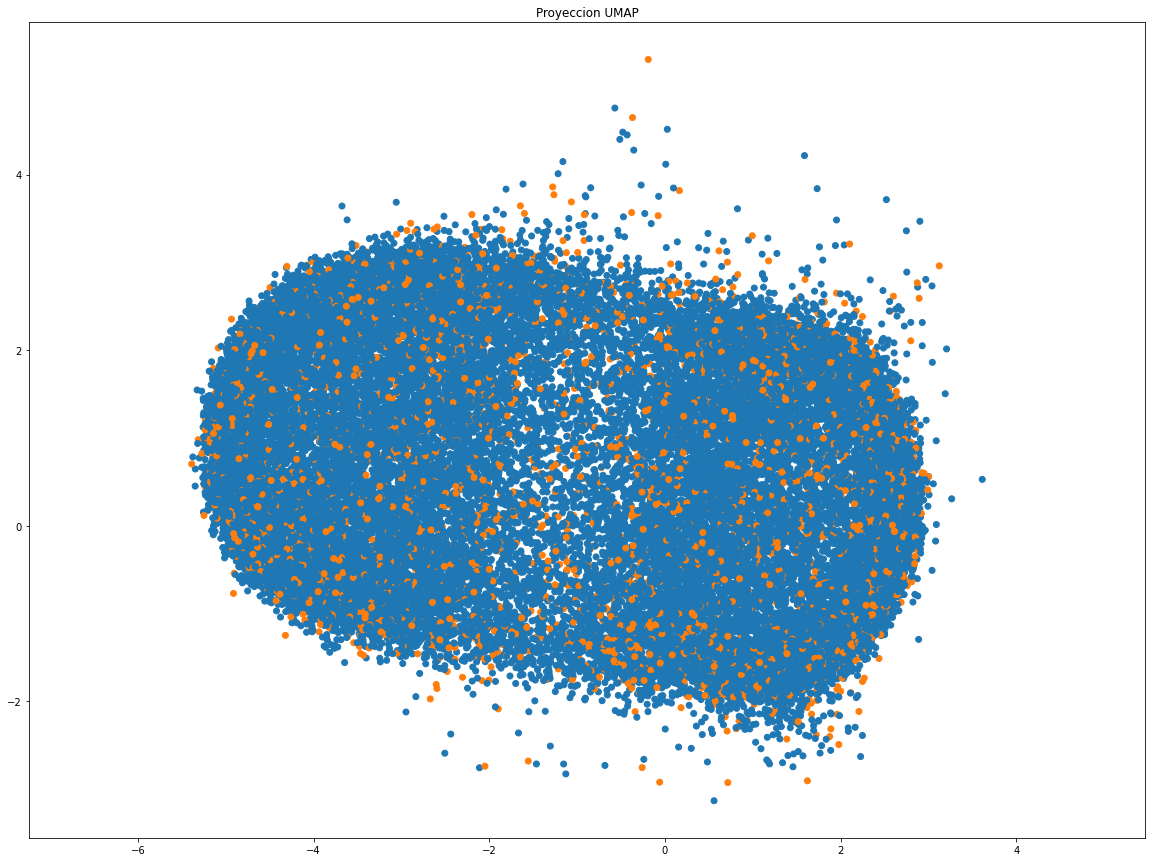

In [14]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buemas predicciones, se van a reducir las 100 dimensiones totales a 30 y se van a aplicar diferentes modelos para predecir los precios

### Reducción a treinta dimensiones

In [5]:
train.head()

,target,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-5.606469,-23.554409,-1.899704,5.221474,2.466672,-8.622253,2.713465,-15.071818,11.416698,...,-4.690509,3.031281,-1.777108,-2.129503,-2.317407,5.582199,1.919842,-0.579323,1.648996,3.402656
1,0,34.878028,11.469291,-3.759774,-19.274506,-8.543841,6.984967,-15.539528,-2.989574,8.116709,...,-5.145828,0.977441,1.555768,-1.873848,-4.411593,1.637559,-6.995692,-3.052852,6.685872,2.244896
2,0,-4.790239,-0.334213,11.359318,8.533317,1.328571,-3.218286,22.019436,-1.662104,-4.055670,...,1.599338,0.496149,0.536455,-1.872459,-0.141536,1.228398,1.816755,0.325430,-2.648416,7.804204
3,0,11.875370,14.050808,24.017588,-4.419429,0.372725,5.805502,20.132591,12.235285,-1.442250,...,-0.257944,2.962409,-2.769238,-0.984059,0.445123,0.679267,1.818855,-6.895533,0.504862,0.108736
4,0,52.713134,24.315340,4.334400,23.857627,-17.868964,16.346566,-15.373475,11.752637,-18.458728,...,-3.560096,-1.473070,-2.654762,4.163998,-1.309631,-0.513197,-7.231648,7.512688,-2.011657,0.729106


In [6]:
train_umap = umap.UMAP(n_components=30, metric='cosine').fit_transform(train.drop(columns=['target']))

In [7]:
train_umap = pd.DataFrame(train_umap)
train_umap.insert(0, 'target', train.target)
train_umap.to_csv('./data/train_umap.csv', index=False)

In [8]:
train_umap.head()

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,6.758425,6.107759,5.583170,4.176225,5.025713,4.377642,5.048572,5.622564,4.814914,...,5.245275,4.276136,5.034873,5.070408,4.891534,5.258639,5.106243,5.020439,4.947837,5.160820
1,0,3.464307,4.591202,4.900424,5.123462,5.319878,4.732382,5.600980,5.952633,4.751034,...,5.270143,4.247860,5.039081,5.035914,4.931864,5.239359,5.106047,5.031158,4.939382,5.154362
2,0,7.130908,4.521430,5.154292,3.877377,5.322951,4.546459,4.810669,5.543257,4.693491,...,5.151262,4.291214,5.053493,5.124120,4.922390,5.295325,5.166308,4.941233,4.967573,5.133875
3,0,4.479191,4.374175,4.497788,4.459589,5.060301,4.576648,4.936561,5.622583,4.671111,...,5.158844,4.279381,5.046312,5.097704,4.962239,5.285526,5.162598,4.930491,4.956057,5.118482
4,0,3.396482,4.455330,5.417948,4.134214,4.988406,4.793623,5.395314,5.915441,4.633820,...,5.171591,4.303300,5.071706,5.093084,4.927096,5.282058,5.194416,4.937039,4.954645,5.133246


In [9]:
test = pd.read_csv('./data/test_pca.csv')
test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,19.310558,-7.189745,-14.152211,-12.594085,-12.557160,17.104067,-7.986200,-7.124415,14.697754,1.082963,...,-1.264135,6.973125,-1.161917,0.363834,-7.285642,-9.697937,1.215286,1.349716,-0.887394,-5.812689
1,28.422055,12.696430,-7.475303,-1.008385,-11.071525,-7.979983,12.372386,5.152625,-3.617820,-8.165359,...,5.163969,-2.421139,-6.956825,-0.857486,1.511218,-2.287641,-7.675856,-0.020116,-5.084505,-1.244078
2,-28.073385,-1.642166,17.169623,22.057033,8.506712,5.593692,5.241545,-8.683844,-8.411760,-4.139848,...,1.851072,-4.775801,-0.262326,-0.663512,-1.169116,8.843264,0.434963,-2.065368,6.567748,-0.332363
3,0.489398,8.736482,-4.891956,3.049124,-22.015048,-4.916794,16.251231,-5.096651,11.535836,16.184523,...,-4.497560,4.386066,2.994792,-6.027321,-8.679143,-1.312548,-0.396737,-1.740509,-7.317483,-2.283116
4,-24.762496,17.051812,-15.548033,-30.756325,-26.771524,13.533663,-14.440224,-1.226883,14.334275,-14.821089,...,0.522447,8.716935,-7.012113,-1.248590,1.099129,-1.392501,-1.365701,1.949465,-1.807950,-0.534773


In [11]:
test_umap = umap.UMAP(n_components=30, metric='cosine').fit(X=train.drop(columns=['target'])).transform(X=test)

In [12]:
test_umap = pd.DataFrame(test_umap)

In [13]:
test_umap.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,3.517959,5.684722,4.464695,5.184043,4.665449,4.922988,4.970303,5.802377,5.281783,4.741971,...,4.960479,4.614135,5.404864,5.114674,5.415142,4.577125,5.160657,4.714718,4.543037,4.988754
1,3.268704,4.232221,4.583746,4.656871,4.645587,4.377311,4.604981,5.593156,5.223948,4.869727,...,4.994976,4.681235,5.367567,5.143870,5.350439,4.544437,5.217453,4.745854,4.465922,4.978706
2,7.612973,5.282360,5.209919,3.495034,5.415030,4.702322,4.833644,5.633666,5.299098,4.817223,...,4.951952,4.782793,5.344330,5.041044,5.300001,4.558415,5.248727,4.792778,4.401516,5.007510
3,4.562814,4.525200,4.676900,4.915673,4.318922,4.532945,4.498651,5.608347,5.276885,4.714563,...,4.968688,4.582967,5.423393,5.134917,5.414476,4.569108,5.186162,4.725140,4.549176,5.016582
4,7.390409,4.434159,4.727757,5.180822,4.646263,4.763058,5.219604,5.861217,5.233482,4.836862,...,5.002894,4.656166,5.347513,5.161112,5.374746,4.584096,5.172031,4.701325,4.509741,4.974921


In [14]:
test_umap.to_csv('./data/test_umap.csv', index = False)

## Datos sin modificar por PCA

In [6]:
train = pd.read_csv('./data/train.csv')
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Reducción a dos dimensiones con target

In [8]:
X = train.drop(columns=['target', 'ID_code'])

y = train.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [10]:
train_umap = umap.UMAP(n_components=2, metric='cosine').fit_transform(X=X_train,y=y_train)

In [11]:
train_umap = pd.DataFrame(train_umap)
train_umap.shape

(160000, 2)

In [12]:
train_umap['target']=pd.DataFrame(y_train.reset_index(drop=True))['target']
train_umap.head()

,0,1,target
0,0.740923,1.356928,0
1,-0.753400,-0.327206,0
2,0.224593,-1.385175,0
3,4.064515,3.885376,1
4,-0.807745,0.733686,0


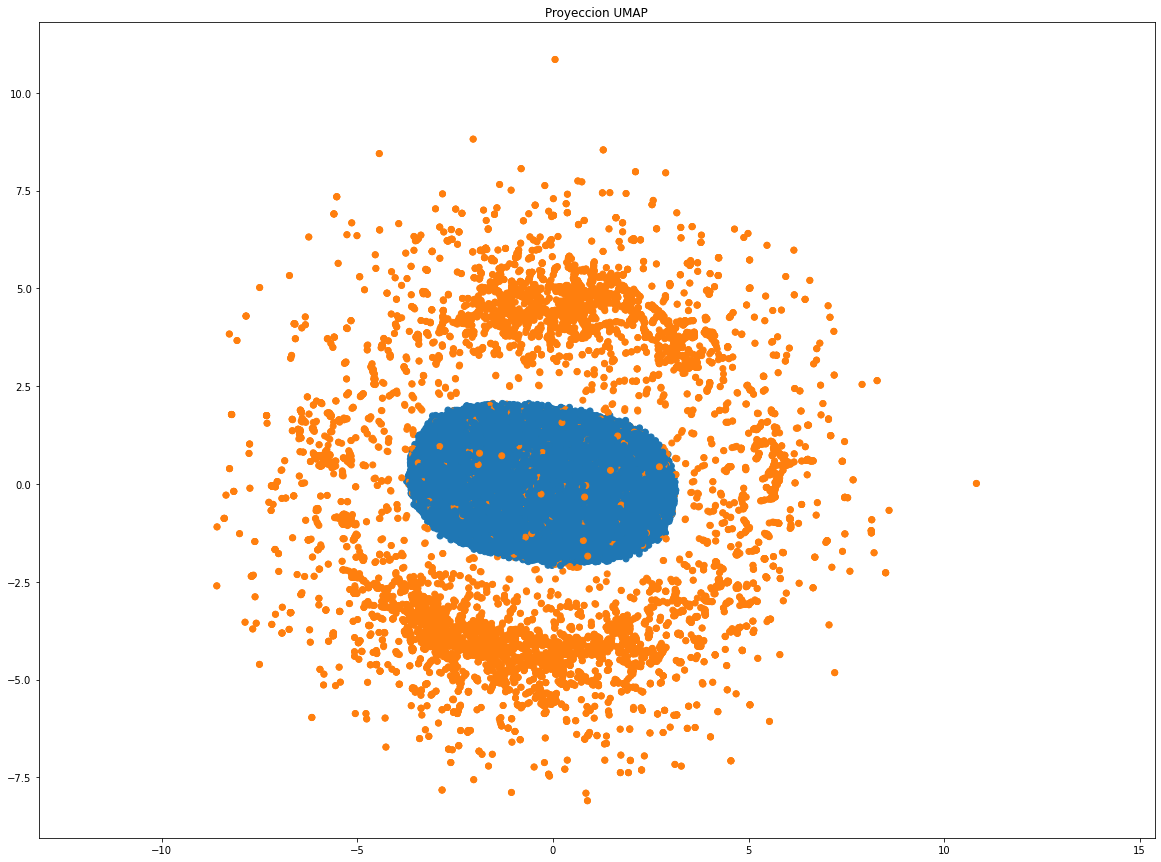

In [13]:
plt.figure(figsize=(20, 15))

plt.scatter(x=train_umap[0], y = train_umap[1], c=[sns.color_palette()[x] for x in train_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

In [14]:
test_umap = umap.UMAP(n_components=2, metric='cosine').fit(X=X_train,y=y_train).transform(X=X_test)
test_umap = pd.DataFrame(test_umap)
test_umap['target']=pd.DataFrame(y_test.reset_index(drop=True))['target']

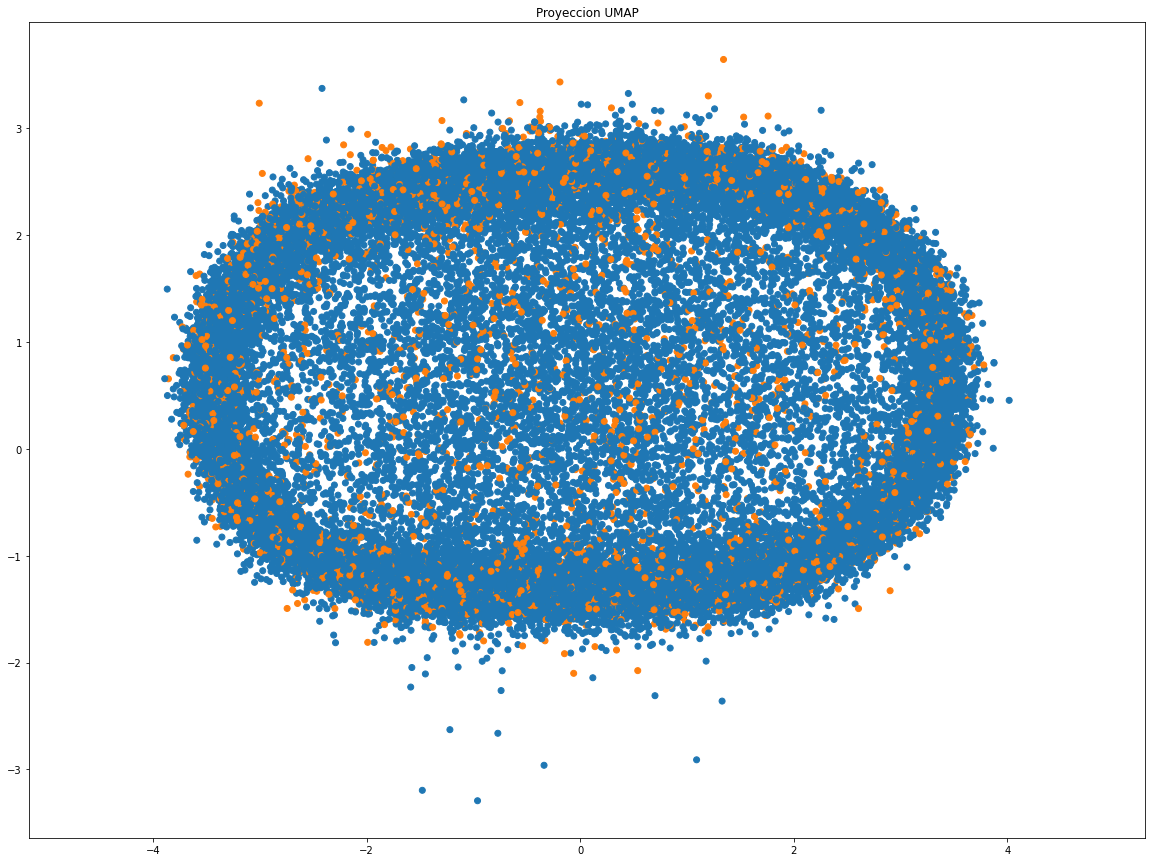

In [15]:
plt.figure(figsize=(20, 15))

plt.scatter(x=test_umap[0], y = test_umap[1], c=[sns.color_palette()[x] for x in test_umap.target])
    
plt.gca().set_aspect('equal', 'datalim')
plt.title('Proyeccion UMAP');

Reducir a 2 dimensiones con umap no arroja buemas predicciones, se van a reducir las 200 dimensiones totales a 30 y se van a aplicar diferentes modelos para predecir los precios